In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,Y
0,1,-12,1.0,0.05,1,5,1.00,c,a,1.00,a,34,c,b,2,c,1,yes,1
1,2,30,3.0,0.31,2,3,0.33,b,a,0.33,a,-11,c,b,1,c,1,yes,2
2,0,-6,1.0,0.10,2,4,0.33,c,a,0.67,a,16,c,b,1,b,2,yes,1
3,1,24,3.0,0.42,2,4,0.33,c,c,1.00,b,12,c,c,1,c,2,yes,1
4,1,6,2.0,0.25,2,3,0.67,c,a,1.00,d,20,c,c,2,c,2,yes,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X01     848 non-null    float64
 1   X02     847 non-null    float64
 2   X03     848 non-null    float64
 3   X04     846 non-null    float64
 4   X05     848 non-null    float64
 5   X06     847 non-null    float64
 6   X07     849 non-null    float64
 7   X08     847 non-null    object 
 8   X09     849 non-null    object 
 9   X10     846 non-null    float64
 10  X11     849 non-null    object 
 11  X12     848 non-null    float64
 12  X13     847 non-null    object 
 13  X14     848 non-null    object 
 14  X15     848 non-null    float64
 15  X16     847 non-null    object 
 16  X17     848 non-null    float64
 17  X18     848 non-null    object 
 18  Y       850 non-null    int64  
dtypes: float64(11), int64(1), object(7)
memory usage: 126.3+ KB


In [2]:
df = df.replace(to_replace='a', value=1)
df = df.replace(to_replace='b', value=2)
df = df.replace(to_replace='c', value=3)
df = df.replace(to_replace='d', value=4)
df = df.replace(to_replace='yes', value =1)
df = df.replace(to_replace='no', value =0)

In [3]:
from pycaret.classification import *
data= setup(data = df, target = 'Y')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6478
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(850, 19)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.767600,0.794000,0.905700,0.791900,0.844300,0.391800
1,Gradient Boosting Classifier,0.766000,0.791800,0.886500,0.801500,0.840700,0.401600
2,Ada Boost Classifier,0.764200,0.762100,0.862300,0.812600,0.835500,0.417500
3,Extreme Gradient Boosting,0.759200,0.793700,0.886200,0.792800,0.836300,0.383400
4,Logistic Regression,0.755900,0.776200,0.877000,0.796000,0.833500,0.377600
5,Light Gradient Boosting Machine,0.755700,0.784300,0.859600,0.803900,0.830100,0.394500
6,Ridge Classifier,0.744100,0.000000,0.869600,0.786500,0.825600,0.348900
7,Linear Discriminant Analysis,0.742400,0.769100,0.850300,0.795300,0.821400,0.360200
8,Extra Trees Classifier,0.732300,0.768700,0.872100,0.773000,0.819100,0.309800
9,Random Forest Classifier,0.715300,0.756300,0.910200,0.740900,0.816300,0.207700


# CATBOOST

In [34]:
cat = create_model('catboost', fold=12)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8400,0.9600,0.9714,0.8293,0.8947,0.5699
1,0.7000,0.7333,0.8000,0.7778,0.7887,0.2718
2,0.8000,0.9029,0.9429,0.8049,0.8684,0.4624
3,0.7800,0.8419,0.9429,0.7857,0.8571,0.3956
4,0.7400,0.7257,0.8286,0.8056,0.8169,0.3689
5,0.7400,0.7962,0.8286,0.8056,0.8169,0.3689
6,0.7755,0.7431,0.9412,0.7805,0.8533,0.3923
7,0.8163,0.8098,0.9706,0.8049,0.8800,0.5028
8,0.8163,0.8863,0.9412,0.8205,0.8767,0.5232
9,0.7143,0.7569,0.8235,0.7778,0.8000,0.3014


In [35]:
en = ensemble_model(cat,fold=12)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8600,0.9543,0.9714,0.8500,0.9067,0.6316
1,0.7000,0.7390,0.8000,0.7778,0.7887,0.2718
2,0.7600,0.9105,0.9429,0.7674,0.8462,0.3258
3,0.8000,0.8629,0.9714,0.7907,0.8718,0.4382
4,0.7200,0.7295,0.8571,0.7692,0.8108,0.2784
5,0.7600,0.7905,0.8571,0.8108,0.8333,0.4059
6,0.8163,0.7667,1.0000,0.7907,0.8831,0.4806
7,0.7959,0.7941,0.9706,0.7857,0.8684,0.4355
8,0.8163,0.8804,0.9412,0.8205,0.8767,0.5232
9,0.7143,0.7686,0.8235,0.7778,0.8000,0.3014


### 200 FOLDS

In [37]:
en1 = ensemble_model(cat, fold=200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
1,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
2,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
3,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
4,0.6667,0.0000,0.6667,1.0000,0.8000,0.0
...,...,...,...,...,...,...
197,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
198,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
199,1.0000,0.0000,1.0000,1.0000,1.0000,NaN
Mean,0.7800,0.6900,0.9167,0.8183,0.8477,NaN


# RANDOM_FOREST, GRADIENT_BOOST, ADA_BOOST

In [81]:
rf = create_model('rf')
rf = ensemble_model(rf, fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.8677,1.0000,0.8400,0.9130,0.6364
1,0.8333,0.9180,0.9048,0.8636,0.8837,0.5902
2,0.7000,0.7063,0.8095,0.7727,0.7907,0.2623
3,0.7667,0.8968,0.9048,0.7917,0.8444,0.3860
4,0.6667,0.8042,0.9048,0.7037,0.7917,0.0196
5,0.7667,0.8492,0.9524,0.7692,0.8511,0.3396
6,0.7000,0.7937,0.9524,0.7143,0.8163,0.0816
7,0.7667,0.7407,0.9048,0.7917,0.8444,0.3860
8,0.7000,0.7143,0.8095,0.7727,0.7907,0.2623
9,0.8333,0.8836,1.0000,0.8077,0.8936,0.5283


In [21]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8167,0.9246,0.9048,0.8444,0.8736,0.5417
1,0.7500,0.7857,0.9048,0.7755,0.8352,0.3304
2,0.7500,0.8558,0.9048,0.7755,0.8352,0.3304
3,0.7167,0.7262,0.8333,0.7778,0.8046,0.2917
4,0.7627,0.8144,0.7805,0.8649,0.8205,0.4732
5,0.7627,0.7778,0.9024,0.7872,0.8409,0.3827
6,0.7797,0.8035,0.9024,0.8043,0.8506,0.4364
7,0.8136,0.8306,0.9268,0.8261,0.8736,0.5231
8,0.6780,0.5759,0.8537,0.7292,0.7865,0.1475
9,0.8305,0.8238,0.9512,0.8298,0.8864,0.5590


In [79]:
ada = create_model('ada')
ada = ensemble_model(ada, fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.9841,0.9524,0.8696,0.9091,0.6610
1,0.8333,0.8677,0.9048,0.8636,0.8837,0.5902
2,0.6667,0.7196,0.7619,0.7619,0.7619,0.2063
3,0.7333,0.7937,0.8095,0.8095,0.8095,0.3651
4,0.7000,0.8201,0.8571,0.7500,0.8000,0.2105
5,0.7333,0.7249,0.8095,0.8095,0.8095,0.3651
6,0.8667,0.8360,1.0000,0.8400,0.9130,0.6364
7,0.6333,0.5344,0.7143,0.7500,0.7317,0.1538
8,0.7000,0.7619,0.7143,0.8333,0.7692,0.3478
9,0.8000,0.7619,0.8571,0.8571,0.8571,0.5238


In [88]:
xg = create_model('xgboost')
xg = ensemble_model(xg, fold=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.000,1.000,1.0000,1.0000
1,1.0000,1.0000,1.000,1.000,1.0000,1.0000
2,0.6667,0.8000,0.800,0.800,0.8000,-0.2000
3,1.0000,1.0000,1.000,1.000,1.0000,1.0000
4,1.0000,1.0000,1.000,1.000,1.0000,1.0000
...,...,...,...,...,...,...
97,1.0000,1.0000,1.000,1.000,1.0000,1.0000
98,1.0000,1.0000,1.000,1.000,1.0000,1.0000
99,0.8000,0.7500,1.000,0.800,0.8889,0.0000
Mean,0.7660,0.7972,0.889,0.810,0.8363,0.3923


In [90]:
ada_gbc= blend_models(estimator_list=[xg,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.0,0.9762,0.8542,0.9111,0.6491
1,0.7333,0.0,0.8810,0.7708,0.8222,0.2982
2,0.7500,0.0,0.9524,0.7547,0.8421,0.2788
3,0.7000,0.0,0.9048,0.7308,0.8085,0.1509
4,0.7458,0.0,0.8780,0.7826,0.8276,0.3497
5,0.8305,0.0,1.0000,0.8039,0.8913,0.5265
6,0.7797,0.0,0.9512,0.7800,0.8571,0.3956
7,0.7797,0.0,0.9024,0.8043,0.8506,0.4364
8,0.7119,0.0,0.9512,0.7222,0.8211,0.1478
9,0.8136,0.0,0.9512,0.8125,0.8764,0.5065


In [91]:
ada_gbc = ensemble_model(ada_gbc, fold=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8333,0.4000,1.0000,0.8333,0.9091,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...
97,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
98,0.8000,1.0000,1.0000,0.8000,0.8889,0.0000
99,0.8000,0.7500,1.0000,0.8000,0.8889,0.0000
Mean,0.7723,0.7271,0.9495,0.7862,0.8538,0.3409


In [92]:
model_ada_gbc = predict_model(estimator=ada_gbc, data=test)
model_ada_gbc

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,Y,Label,Score
0,1,2,1,0.11,2,3,1.00,4,3,0.33,...,0,1,1,2,3,1,0,NaN,1,0.0
1,0,6,1,0.21,1,4,0.67,3,1,1.00,...,10,3,2,2,3,1,1,NaN,1,0.0
2,0,-3,1,0.07,2,3,1.00,3,1,1.00,...,2,3,3,2,3,1,1,NaN,1,0.0
3,1,0,4,0.07,2,4,1.00,3,1,1.00,...,-1,3,3,2,2,2,1,NaN,1,0.0
4,0,18,2,0.58,2,5,0.33,3,1,0.33,...,12,3,2,2,3,2,1,NaN,1,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,-6,3,0.08,2,4,0.67,2,1,1.00,...,-2,3,2,1,2,1,1,NaN,1,0.0
146,1,12,3,0.20,2,3,1.00,1,1,1.00,...,7,3,2,1,4,1,1,NaN,1,0.0
147,0,-6,3,0.03,2,5,1.00,3,1,1.00,...,5,3,2,1,3,1,1,NaN,1,0.4
148,1,27,3,0.09,2,3,1.00,3,1,1.00,...,-10,3,3,1,3,1,1,NaN,2,0.8


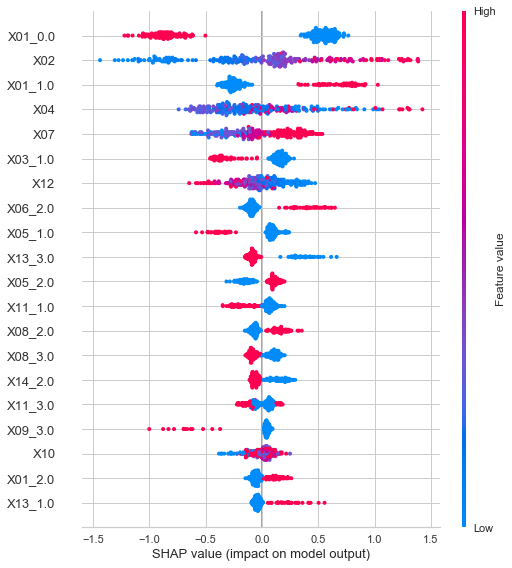

In [44]:
interpret_model(cat)

In [48]:
test = pd.read_csv('test.csv')
test.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,Y
0,1,2,1,0.11,2,3,1.00,d,c,0.33,b,0,a,a,2,c,1,no,NaN
1,0,6,1,0.21,1,4,0.67,c,a,1.00,b,10,c,b,2,c,1,yes,NaN
2,0,-3,1,0.07,2,3,1.00,c,a,1.00,d,2,c,c,2,c,1,yes,NaN
3,1,0,4,0.07,2,4,1.00,c,a,1.00,d,-1,c,c,2,b,2,yes,NaN
4,0,18,2,0.58,2,5,0.33,c,a,0.33,c,12,c,b,2,c,2,yes,NaN


In [49]:
test = test.replace(to_replace='a', value=1)
test = test.replace(to_replace='b', value=2)
test = test.replace(to_replace='c', value=3)
test = test.replace(to_replace='d', value=4)
test = test.replace(to_replace='yes', value =1)
test = test.replace(to_replace='no', value =0)
test.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,Y
0,1,2,1,0.11,2,3,1.00,4,3,0.33,2,0,1,1,2,3,1,0,NaN
1,0,6,1,0.21,1,4,0.67,3,1,1.00,2,10,3,2,2,3,1,1,NaN
2,0,-3,1,0.07,2,3,1.00,3,1,1.00,4,2,3,3,2,3,1,1,NaN
3,1,0,4,0.07,2,4,1.00,3,1,1.00,4,-1,3,3,2,2,2,1,NaN
4,0,18,2,0.58,2,5,0.33,3,1,0.33,3,12,3,2,2,3,2,1,NaN


In [53]:
predict_cat = predict_model(estimator=en1, data=test)
predict_cat

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,Y,Label,Score
0,1,2,1,0.11,2,3,1.00,4,3,0.33,...,0,1,1,2,3,1,0,NaN,1,0.3817
1,0,6,1,0.21,1,4,0.67,3,1,1.00,...,10,3,2,2,3,1,1,NaN,1,0.2483
2,0,-3,1,0.07,2,3,1.00,3,1,1.00,...,2,3,3,2,3,1,1,NaN,1,0.3820
3,1,0,4,0.07,2,4,1.00,3,1,1.00,...,-1,3,3,2,2,2,1,NaN,1,0.4665
4,0,18,2,0.58,2,5,0.33,3,1,0.33,...,12,3,2,2,3,2,1,NaN,2,0.5258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,-6,3,0.08,2,4,0.67,2,1,1.00,...,-2,3,2,1,2,1,1,NaN,1,0.2800
146,1,12,3,0.20,2,3,1.00,1,1,1.00,...,7,3,2,1,4,1,1,NaN,1,0.4679
147,0,-6,3,0.03,2,5,1.00,3,1,1.00,...,5,3,2,1,3,1,1,NaN,1,0.4916
148,1,27,3,0.09,2,3,1.00,3,1,1.00,...,-10,3,3,1,3,1,1,NaN,2,0.7208


In [58]:
s1=0
for i in range (len(predict_cat)):
    s1+=predict_cat['Score'][i]
    
s1

54.30750000000001

In [61]:
finalize_model(en1)

BaggingClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x1a38529490>,
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=5714, verbose=0,
                  warm_start=False)

In [68]:
stack = create_stacknet(estimator_list =[[xg,ada],[ada,gbc]])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.9101,0.9048,0.8636,0.8837,0.5902
1,0.7167,0.7262,0.8095,0.7907,0.8000,0.3145
2,0.7167,0.8161,0.8571,0.7660,0.8090,0.2672
3,0.7500,0.7368,0.8333,0.8140,0.8235,0.3952
4,0.7458,0.7656,0.8049,0.8250,0.8148,0.4096
5,0.8305,0.7480,0.9756,0.8163,0.8889,0.5433
6,0.7119,0.7778,0.9024,0.7400,0.8132,0.2096
7,0.7458,0.8103,0.8293,0.8095,0.8193,0.3909
8,0.6780,0.6260,0.8293,0.7391,0.7816,0.1763
9,0.8136,0.8130,0.9268,0.8261,0.8736,0.5231


In [78]:
lr = create_model('lr')
lr = ensemble_model(lr, fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.9683,0.9524,0.8333,0.8889,0.5614
1,0.8333,0.8624,0.8571,0.9000,0.8780,0.6154
2,0.7000,0.6561,0.8095,0.7727,0.7907,0.2623
3,0.7333,0.7884,0.8095,0.8095,0.8095,0.3651
4,0.7667,0.8042,0.9048,0.7917,0.8444,0.3860
5,0.7000,0.7831,0.8095,0.7727,0.7907,0.2623
6,0.7667,0.7407,0.9524,0.7692,0.8511,0.3396
7,0.6667,0.7196,0.7143,0.7895,0.7500,0.2537
8,0.6667,0.6878,0.7143,0.7895,0.7500,0.2537
9,0.9000,0.9206,0.9524,0.9091,0.9302,0.7541


In [76]:
gbc = ensemble_model(gbc, fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.9418,1.0000,0.8077,0.8936,0.5283
1,0.8667,0.9524,0.9048,0.9048,0.9048,0.6825
2,0.7333,0.7513,0.8095,0.8095,0.8095,0.3651
3,0.7333,0.8466,0.8571,0.7826,0.8182,0.3220
4,0.8000,0.8519,0.9524,0.8000,0.8696,0.4545
5,0.8333,0.8519,0.9524,0.8333,0.8889,0.5614
6,0.7667,0.8042,0.9524,0.7692,0.8511,0.3396
7,0.7000,0.7037,0.8571,0.7500,0.8000,0.2105
8,0.6667,0.7249,0.7143,0.7895,0.7500,0.2537
9,0.8667,0.9524,0.9524,0.8696,0.9091,0.6610


In [82]:
blend= blend_models(estimator_list=[ada,gbc,xg,lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8500,0.0,0.9524,0.8511,0.8989,0.6121
1,0.7500,0.0,0.8810,0.7872,0.8315,0.3534
2,0.7667,0.0,0.9524,0.7692,0.8511,0.3396
3,0.7167,0.0,0.9048,0.7451,0.8172,0.2130
4,0.7458,0.0,0.8537,0.7955,0.8235,0.3710
5,0.8475,0.0,1.0000,0.8200,0.9011,0.5816
6,0.7458,0.0,0.9512,0.7500,0.8387,0.2764
7,0.7627,0.0,0.8780,0.8000,0.8372,0.4032
8,0.6780,0.0,0.9024,0.7115,0.7957,0.0834
9,0.7966,0.0,0.9756,0.7843,0.8696,0.4318


In [83]:
blend = ensemble_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.9041,0.9762,0.8542,0.9111,0.6491
1,0.7167,0.7361,0.8571,0.7660,0.8090,0.2672
2,0.7500,0.8505,0.9524,0.7547,0.8421,0.2788
3,0.7333,0.6700,0.9524,0.7407,0.8333,0.2157
4,0.7627,0.7710,0.9024,0.7872,0.8409,0.3827
5,0.8305,0.7581,1.0000,0.8039,0.8913,0.5265
6,0.7458,0.7439,0.9756,0.7407,0.8421,0.2481
7,0.7627,0.7683,0.9024,0.7872,0.8409,0.3827
8,0.7288,0.5163,0.9756,0.7273,0.8333,0.1820
9,0.7966,0.8394,0.9512,0.7959,0.8667,0.4520


In [84]:
predict_blend = predict_model(estimator=blend, data=test)
predict_blend

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,Y,Label,Score
0,1,2,1,0.11,2,3,1.00,4,3,0.33,...,0,1,1,2,3,1,0,NaN,1,0.0
1,0,6,1,0.21,1,4,0.67,3,1,1.00,...,10,3,2,2,3,1,1,NaN,1,0.0
2,0,-3,1,0.07,2,3,1.00,3,1,1.00,...,2,3,3,2,3,1,1,NaN,1,0.0
3,1,0,4,0.07,2,4,1.00,3,1,1.00,...,-1,3,3,2,2,2,1,NaN,1,0.1
4,0,18,2,0.58,2,5,0.33,3,1,0.33,...,12,3,2,2,3,2,1,NaN,1,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,-6,3,0.08,2,4,0.67,2,1,1.00,...,-2,3,2,1,2,1,1,NaN,1,0.0
146,1,12,3,0.20,2,3,1.00,1,1,1.00,...,7,3,2,1,4,1,1,NaN,1,0.3
147,0,-6,3,0.03,2,5,1.00,3,1,1.00,...,5,3,2,1,3,1,1,NaN,1,0.3
148,1,27,3,0.09,2,3,1.00,3,1,1.00,...,-10,3,3,1,3,1,1,NaN,2,0.9


In [106]:
s2=0
for i in range (len(model_ada_gbc)):
    s2+=model_ada_gbc['Score'][i]
    
s2

22.0

In [108]:
import os
base_filename = 'sak.txt'
WorkingFolder=os. getcwd()
with open(os.path.join(WorkingFolder, base_filename),'w') as outfile:
    model_ada_gbc['Label'].to_string(outfile)